<a href="https://colab.research.google.com/github/apekshyasharma/BloomTaxonomyClassifier/blob/main/BloomTaxonomyClassifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questions Classifier according to Blooms Taxonomy**
## Dataset Description (Kaggle Source)

This project uses the **Bloom’s Taxonomy Dataset** sourced from **Kaggle**. The dataset is a structured collection of educational questions/tasks that have been **manually categorized** according to **Bloom’s Taxonomy**, a widely used educational framework for classifying cognitive learning objectives into hierarchical levels of complexity.

### Bloom’s Taxonomy Levels in the Dataset
The dataset contains six target classes, where each class represents a progressively higher cognitive skill level:

- **BT1 — Remembering:** Recall or recognize basic facts and concepts.  
- **BT2 — Understanding:** Explain ideas or interpret meaning.  
- **BT3 — Applying:** Use learned knowledge in new situations or solve problems.  
- **BT4 — Analyzing:** Break information into parts and identify patterns/relationships.  
- **BT5 — Evaluating:** Make judgments based on criteria and justify decisions.  
- **BT6 — Creating:** Produce new ideas, solutions, or approaches by combining concepts.

### Why this dataset is useful for this project
This dataset is suitable for developing and evaluating **machine learning models for multi-class text classification**, where the goal is to predict the Bloom level of a question based on its wording. It supports research and development in:

- automated assessment and curriculum design  
- educational analytics and learning objective classification  
- intelligent tutoring and adaptive learning systems  

By learning patterns in educational language (e.g., action verbs such as *define*, *compare*, *justify*, *design*), a model can help educators and systems **automatically map questions to cognitive levels**, saving time and improving consistency in instructional design.


# **Step 1: Setup, Loading Dataset and Importing Necessary Libraries**

In [ ]:
# Import libraries for EDA
import numpy as np
import pandas as pd

In [ ]:
# Mount drive for dataset loading
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# fixate random seed value so that the values does't change with every restart of cell
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [ ]:
# Load the dataset in Pandas DataFrame
df=pd.read_csv('/content/drive/MyDrive/datasets/blooms_taxonomy_datasets.csv')
df

,Questions,Category
0,About what proportion of the population of the...,BT1
1,Correctly label the brain lobes indicated on t...,BT1
2,Define compound interest.,BT1
3,Define four types of traceability,BT1
4,Define mercantilism.,BT1
...,...,...
8762,Distinguish between different types of soil st...,BT4
8763,Invent a blockchain-based solution for transpa...,BT6
8764,Compare the advantages and disadvantages of us...,BT4
8765,"Describe the purpose of the ""volatile"" keyword...",BT1


In [ ]:
print(f"Dataset shape: {df.shape}") # Output: 8767 Rows and 2 Columns

Dataset shape: (8767, 2)


In [ ]:
# See the column names in a list format
print(f"The column names are:{df.columns.tolist()}")

The column names are:['Questions', 'Category']


In [ ]:
# show first 5 rows of the dataset
df.head()

,Questions,Category
0,About what proportion of the population of the...,BT1
1,Correctly label the brain lobes indicated on t...,BT1
2,Define compound interest.,BT1
3,Define four types of traceability,BT1
4,Define mercantilism.,BT1


# **Step 2: Data Understanding**

In [ ]:
# Examining the datatypes and missing values with .info() function
print("-------DATATYPES AND MISSING VALUES------")
df.info() # Output: 0 missing values

-------DATATYPES AND MISSING VALUES------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8767 entries, 0 to 8766
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Questions  8767 non-null   object
 1   Category   8767 non-null   object
dtypes: object(2)
memory usage: 137.1+ KB


In [ ]:
# Verify search for missing values
df.isnull().sum() # Output: 0 missing values

,0
Questions,0
Category,0


In [ ]:
# Verifying with duplicated rows
duplicated_rows=df.duplicated().sum()
print(duplicated_rows) # Output: 0 duplicated rows

0


In [ ]:
df["Questions"].nunique() #8767 number of total questions

8767

In [ ]:
df["Category"].nunique() # 6 Bloom Taxonomical Categories

6

# **Step 3. Class Imbalance Detection in Target Distribution**

In [ ]:
# Checking for total count and count percentage for entries in each bloom taxonomical classes
count_classes=df["Category"].value_counts()
count_class_percentage=df["Category"].value_counts(normalize=True)*100

class_summary=pd.DataFrame({"Count":count_classes,
                            "Percentage":count_class_percentage})
class_summary

,Count,Percentage
Category,,
BT1,2582,29.451352
BT2,1801,20.542945
BT3,1508,17.200867
BT4,1293,14.748489
BT6,800,9.125128
BT5,783,8.931219


## **Class Distribution (Target Variable: `Category`)**

### **What this shows**
The table below shows the **number of questions (Count)** in each Bloom’s Taxonomy category and the **percentage share** of each class in the dataset.

### **Why it matters**
Understanding class distribution is essential because **class imbalance** can affect model learning and evaluation. If some categories have fewer samples, models may become biased toward larger classes. For this reason, later evaluation will include **macro and weighted F1-scores** in addition to accuracy.

### **Interpretation of results**
- The dataset contains **8,767 questions** across **six categories (BT1–BT6)**.
- **BT1** is the most frequent class (**29.45%**), followed by **BT2** (**20.54%**).
- **BT5** (**8.93%**) and **BT6** (**9.13%**) are the smallest classes, indicating a **moderate imbalance**.
- This imbalance suggests that some Bloom levels may be harder for models to learn, so class-sensitive evaluation is required.


In [ ]:
# Checking for lenght in characters and words for each columns
df["characterLength"]=df["Questions"].astype(str).str.len()
df["wordLength"]=df["Questions"].astype(str).str.split().apply(len)

print("---- Text Length Summary ----")
display(df[["characterLength", "wordLength"]].describe()) #.describe to see all the statistical values

---- Text Length Summary ----


,characterLength,wordLength
count,8767.000000,8767.000000
mean,87.638189,13.077450
std,61.263056,8.482286
min,2.000000,1.000000
25%,51.000000,8.000000
50%,69.000000,11.000000
75%,106.500000,16.000000
max,540.000000,75.000000


## **Text Length Statistics (Questions)**

### **What this shows**
This summary describes the distribution of text length in the `Questions` column using:
- **Character length** (number of characters in each question)
- **Word length** (number of words in each question)

### **Why it matters**
Text length affects:
- **feature extraction** in classical models (TF-IDF vocabulary and sparsity)
- **tokenization and truncation** in transformer models (maximum input length)
- detection of **outliers**, such as unusually short or unusually long questions

### **Interpretation of results**
- The average question length is approximately **87.6 characters** and **13.1 words**.
- The median question length is **69 characters** and **11 words**, indicating that most questions are short-to-medium length.
- The dataset contains very short entries (minimum **1 word / 2 characters**), which may include low-information samples.
- The longest questions reach **75 words / 540 characters**, representing a small number of longer samples that may require truncation for transformer models.

### **Next action**
In the next step, we inspect extremely short questions and outliers to decide whether they should be retained, cleaned, or excluded, while avoiding changes that could distort class balance.


In [ ]:
df.columns

Index(['Questions', 'Category', 'characterLength', 'wordLength'], dtype='object')

### **Checking for empty or invalid text entries**
Even if a column has no missing (non-null) values, it may still contain invalid strings such as empty text (`""`) or whitespace-only text (`"   "`).  
We detect these cases by stripping whitespace and checking whether the remaining string is empty.


In [ ]:
#Check for blank entries
blank_mask=df["Questions"].astype(str).str.strip().eq("")  # No empty spaces while converting to a str type
print(f"total of Blank Spaces: {blank_mask.sum()}")

total of Blank Spaces: 0


In [ ]:
# Check for nan values
nan_mask=df["Questions"].astype(str).str.split().str.lower().eq("nan") # No nan/NAN/NaN values
print(f"Total of nan values: {nan_mask.sum()}")

Total of nan values: 0


In [ ]:
df.columns

Index(['Questions', 'Category', 'characterLength', 'wordLength'], dtype='object')

In [ ]:
shortest = df.sort_values("wordLength").head(15)[["Questions", "Category", "wordLength"]]
display(shortest)

,Questions,Category,wordLength
3582,Class.,BT1,1
1416,Prove,BT4,1
921,Mr.,BT3,1
3876,E.,BT1,1
4217,cohesion.,BT3,1
1987,Fig.,BT3,1
4246,Define corrosion.,BT1,2
4552,Define Equalizer.,BT1,2
3602,Define filter.,BT2,2
1725,Define Condensation?,BT1,2


# **Visualization for Handeling extreme noises**

In [ ]:
df.shape

(8767, 4)

### **Class Distribution Diagram**

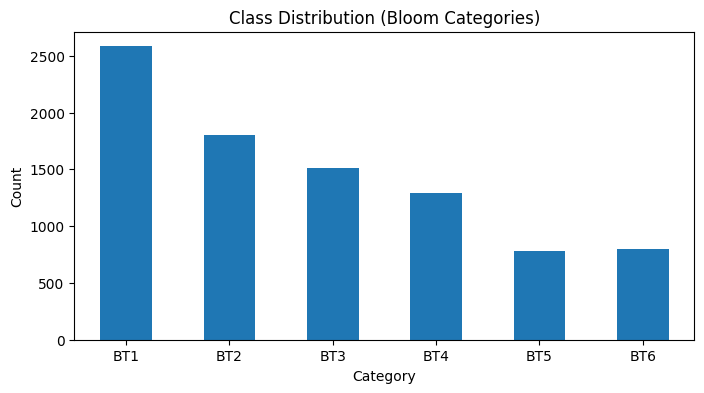

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Bar plot
plt.figure(figsize=(8, 4))
count_classes.sort_index().plot(kind="bar")
plt.title("Class Distribution (Bloom Categories)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()
plt.savefig("class_distribution.png")


### **Key insights from the results**
- **BT1 is the most common class** with **2,582 questions (29.45%)**, indicating that lower-order cognitive questions dominate the dataset.
- **BT2–BT4** have moderate representation (approximately **14.7%–20.5%** each).
- **BT5 and BT6 are the smallest classes** (around **9% each**), meaning fewer training examples are available for higher-order cognitive levels.
- Overall, the dataset shows **moderate class imbalance**, which should be handled during modeling (e.g., class weights and balanced metrics).

---

### **Implication for modeling and evaluation**
Given this imbalance, the project will:
- report **weighted and macro precision/recall/F1**
- use **stratified splitting** to preserve class proportions in train/test sets
- consider **class weighting** in classical ML models to reduce bias toward majority classes

In [ ]:
# Display percentile table
# Exact word-length percentiles
percentiles = [0, 1, 5, 10, 25, 50, 75, 90, 95, 99, 100]
wl = df["wordLength"]

percentile_table = pd.DataFrame({
    "Percentile": percentiles,
    "Word Length": [np.percentile(wl, p) for p in percentiles]
})

display(percentile_table)

,Percentile,Word Length
0,0,1.0
1,1,3.0
2,5,5.0
3,10,6.0
4,25,8.0
5,50,11.0
6,75,16.0
7,90,22.0
8,95,30.0
9,99,49.0


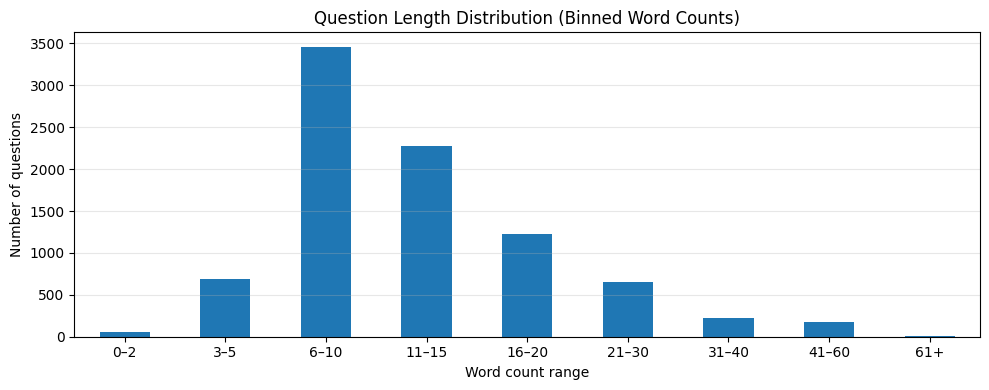

In [ ]:
bins = [0, 2, 5, 10, 15, 20, 30, 40, 60, 100]
labels = ["0–2", "3–5", "6–10", "11–15", "16–20", "21–30", "31–40", "41–60", "61+"]

word_bin = pd.cut(df["wordLength"], bins=bins, labels=labels, include_lowest=True)
counts = word_bin.value_counts().sort_index()

plt.figure(figsize=(10, 4))
counts.plot(kind="bar")
plt.title("Question Length Distribution (Binned Word Counts)")
plt.xlabel("Word count range")
plt.ylabel("Number of questions")
plt.xticks(rotation=0)
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("question_length_distribution.png")
plt.show()

### **Word-length percentiles**

Percentiles provide an interpretable summary of text length and help identify where outliers begin.

Key observations:
- The median question length is **11 words** (50th percentile).
- 75% of questions are **≤ 16 words**, indicating most questions are short-to-medium length.
- 95% of questions are **≤ 30 words**, meaning only 5% exceed 30 words.
- The longest questions reach **75 words**, but these represent a small tail (rare cases).

These findings are useful when selecting preprocessing rules and transformer settings (e.g., maximum sequence length).


In [ ]:
#Percentile table for character length
df["characterLength"] = df["Questions"].astype(str).str.len()
percentiles = [0, 1, 5, 10, 25, 50, 75, 90, 95, 99, 100]
cl = df["characterLength"]

char_p_table = pd.DataFrame({
    "Percentile": percentiles,
    "Character Length": [np.percentile(cl, p) for p in percentiles]
})

display(char_p_table)

,Percentile,Character Length
0,0,2.0
1,1,17.0
2,5,28.0
3,10,37.0
4,25,51.0
5,50,69.0
6,75,106.5
7,90,156.0
8,95,194.0
9,99,360.0


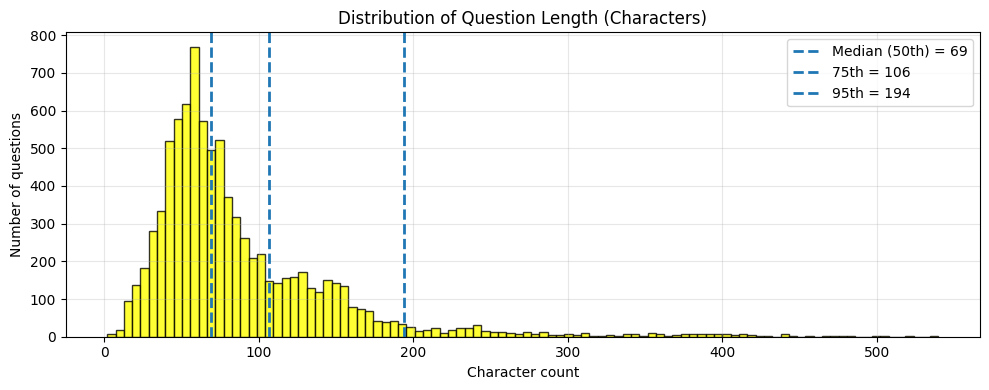

In [ ]:
p50 = np.percentile(cl, 50)
p75 = np.percentile(cl, 75)
p95 = np.percentile(cl, 95)

plt.figure(figsize=(10, 4))
plt.hist(cl, bins="auto", color="yellow", edgecolor="black", alpha=0.8)

plt.title("Distribution of Question Length (Characters)")
plt.xlabel("Character count")
plt.ylabel("Number of questions")
plt.grid(True, alpha=0.3)

plt.axvline(p50, linestyle="--", linewidth=2, label=f"Median (50th) = {p50:.0f}")
plt.axvline(p75, linestyle="--", linewidth=2, label=f"75th = {p75:.0f}")
plt.axvline(p95, linestyle="--", linewidth=2, label=f"95th = {p95:.0f}")
plt.legend()
plt.tight_layout()
plt.savefig("character_length_distribution.png")
plt.show()

## **Character Length Distribution**

### **Summary of results**
Character length provides another view of text size and helps identify unusually short entries and long outliers.

Key findings from percentile analysis:
- The median question length is **69 characters** (50th percentile).
- 75% of questions are **≤ 106.5 characters**, indicating most questions are relatively short.
- 95% of questions are **≤ 194 characters**, meaning only 5% exceed this length.
- A small number of extreme outliers exist (99th percentile = **360 characters**, maximum = **540 characters**), forming a long right tail.

### **Implications for modeling**
- Most questions are short enough for both classical TF-IDF models and transformer models without aggressive truncation.
- Extremely short entries (e.g., 1–2 words or only a few characters) may contain limited information and can be reviewed as potential noise.
- Long outliers should be considered when selecting transformer max sequence length, although they represent a small minority.


In [ ]:
short_mask = df["wordLength"] <= 2
print("Ultra-short (<=2 words):", short_mask.sum(), f"({short_mask.mean()*100:.2f}%)")
display(df.loc[short_mask, "Category"].value_counts())

Ultra-short (<=2 words): 53 (0.60%)


,count
Category,
BT1,38
BT5,5
BT2,5
BT3,3
BT4,2


### **Ultra-short questions (≤ 2 words)**

We inspected the dataset for extremely short questions (≤2 words).  
A total of **53 out of 8,767** questions fall into this category (**~0.60%** of the dataset).

Class-wise breakdown of these ultra-short entries:
- BT1: 38
- BT2: 5
- BT3: 3
- BT4: 2
- BT5: 5
- BT6: 0

Although a few samples appear low-information (e.g., abbreviations), short questions can still be valid in Bloom’s taxonomy (e.g., "Define", "Prove"). Therefore, we **retain** these entries and handle any impact through robust evaluation (per-class metrics and confusion matrices).


# **Step 4: Visualize word cloud**

In [ ]:
!pip -q install wordcloud

In [ ]:
df.columns

Index(['Questions', 'Category', 'characterLength', 'wordLength'], dtype='object')

In [ ]:
df

,Questions,Category,characterLength,wordLength
0,About what proportion of the population of the...,BT1,69,13
1,Correctly label the brain lobes indicated on t...,BT1,62,10
2,Define compound interest.,BT1,25,3
3,Define four types of traceability,BT1,33,5
4,Define mercantilism.,BT1,20,2
...,...,...,...,...
8762,Distinguish between different types of soil st...,BT4,210,25
8763,Invent a blockchain-based solution for transpa...,BT6,138,15
8764,Compare the advantages and disadvantages of us...,BT4,122,16
8765,"Describe the purpose of the ""volatile"" keyword...",BT1,73,10


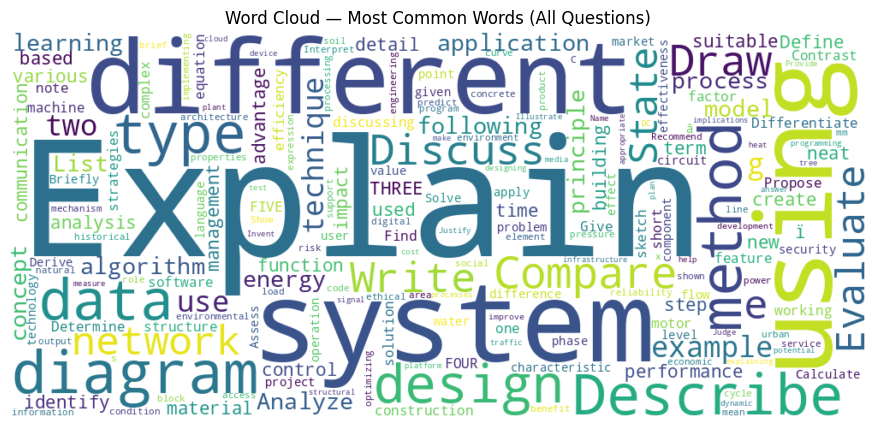

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all text
text_all = " ".join(df["Questions"].astype(str).tolist())

# Create word cloud
wc = WordCloud(
    width=1000,
    height=450,
    background_color="white",
    stopwords=STOPWORDS,   # removes common English stopwords
    collocations=False     # prevents bigrams like "New York"
).generate(text_all)

plt.figure(figsize=(12, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud — Most Common Words (All Questions)")
plt.savefig("word_cloud_all.png")
plt.show()

### **Class wise Word Cloud diagrams**

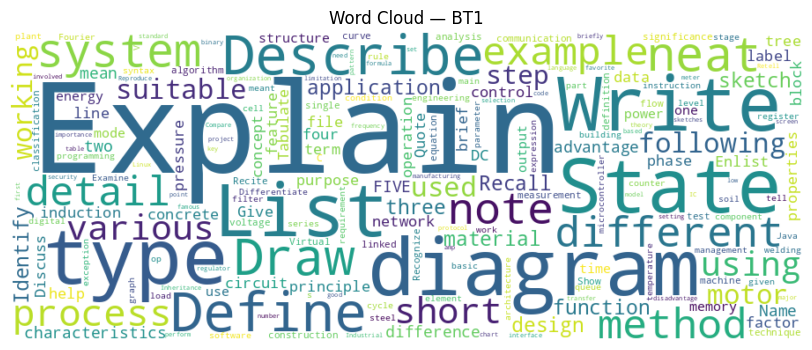

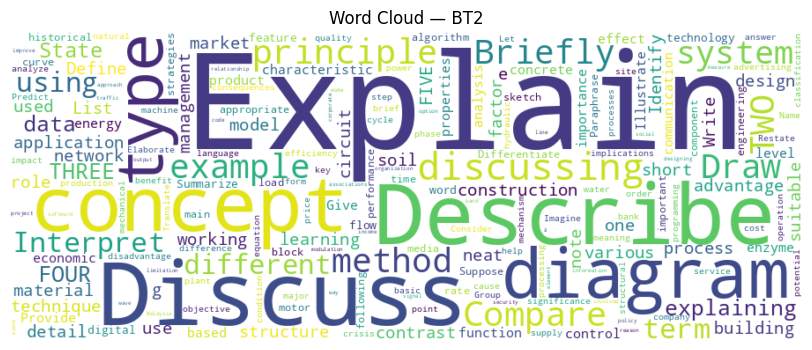

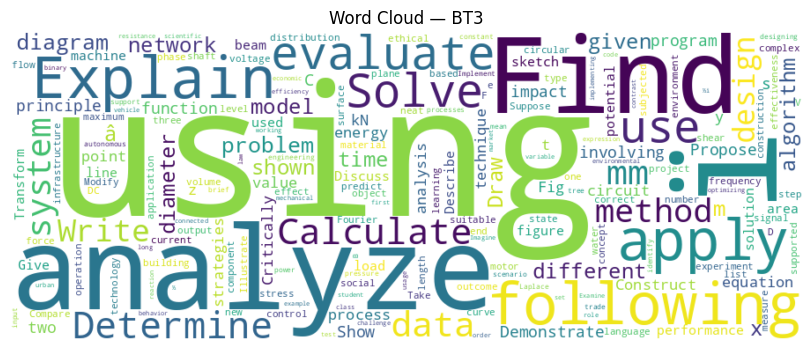

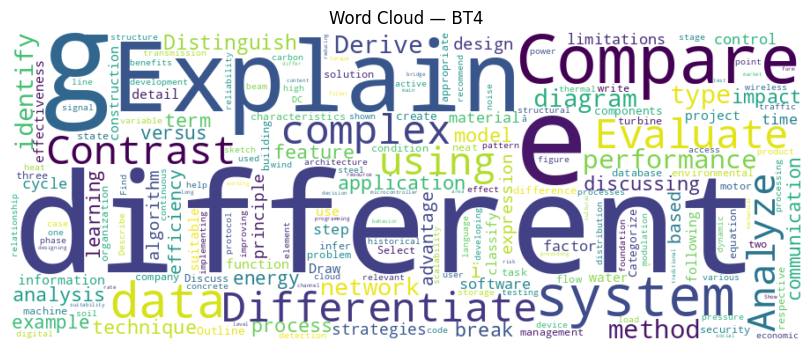

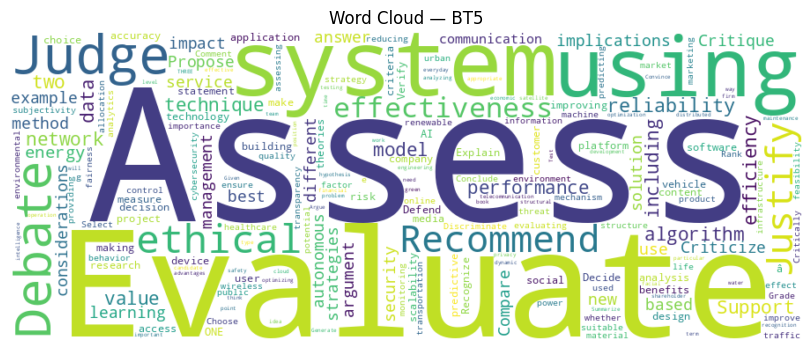

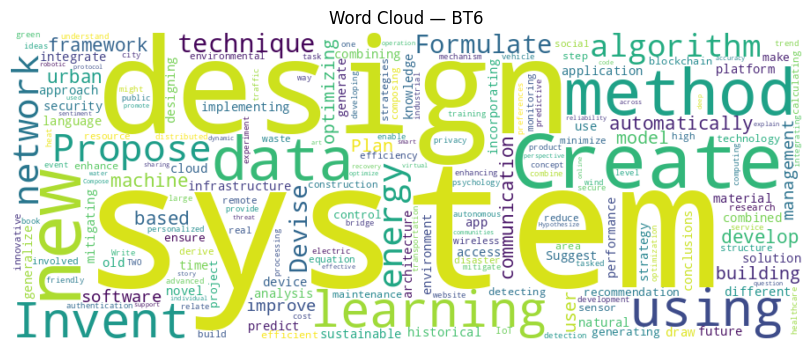

In [ ]:
stopwords = set(STOPWORDS)

# Create per-class word clouds
classes = sorted(df["Category"].unique())

for c in classes:
    text_c = " ".join(df.loc[df["Category"] == c, "Questions"].astype(str))

    wc = WordCloud(
        width=900,
        height=350,
        background_color="white",
        stopwords=stopwords,
        collocations=False
    ).generate(text_c)

    plt.figure(figsize=(11, 4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud — {c}")
    plt.savefig(f"word_cloud_{c}.png")
    plt.show()

In [ ]:
df.loc[df['Category'] == 'BT4']

,Questions,Category,characterLength,wordLength
206,Analyze safe and dangerous aspects of these fe...,BT4,53,8
207,Analyze the characteristics of frogs.,BT4,37,5
208,Analyze the movements and sounds of a frog.,BT4,43,8
209,"Analyze the problem, identifying its variables.",BT4,47,6
210,Break down the components of a standard film c...,BT4,107,19
...,...,...,...,...
8758,Compare the energy efficiency of different ref...,BT4,154,19
8759,Contrast the benefits and limitations of using...,BT4,211,29
8760,Compare the performance of different sorting a...,BT4,139,18
8762,Distinguish between different types of soil st...,BT4,210,25


##  **Word Clouds by Bloom Category (Class-wise Vocabulary)**

### **What this visualization shows**
To better understand how language differs across Bloom’s Taxonomy levels, we generated a separate word cloud for each class (BT1–BT6). Each word cloud highlights the most frequent words within that category.

---

### **Why this matters**
Bloom levels are strongly associated with **instructional verbs** (e.g., "define", "compare", "evaluate"). If the dataset is well-labelled, we expect different categories to contain different dominant verbs and task language. Class-wise word clouds provide an intuitive way to verify these patterns before modeling.

---

### **Key observations (evidence of meaningful class signals)**
- **BT1 (Remembering):** frequent recall verbs such as *define*, *list*, *write*, *describe*.
- **BT2 (Understanding):** comprehension verbs such as *discuss*, *explain*, *interpret*, *illustrate*.
- **BT3 (Applying):** application verbs such as *calculate*, *determine*, *solve*, *use*.
- **BT4 (Analyzing):** analytical verbs such as *compare*, *analyze*, *differentiate*, *contrast*.
- **BT5 (Evaluating):** judgment/criteria terms such as *assess*, *evaluate*, *justify*, and decision-oriented language.
- **BT6 (Creating):** creation verbs such as *design*, *propose*, *invent*, *develop*, *formulate*.

---
### **Interpretation**
The vocabulary patterns across categories align well with Bloom’s Taxonomy definitions, suggesting the dataset contains strong linguistic cues for multi-class text classification. These findings support the use of both classical NLP models (TF-IDF + classifiers) and transformer-based models.


# **Step 5: Text Preprocessing for Model Implementation**

In [ ]:
# Working on a safe copy
df_copy = df.copy()

# Basic normalization (safe for both classical + transformer)
df_copy["text_base"] = (
    df["Questions"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)

In [ ]:
df["Category"]

,Category
0,BT1
1,BT1
2,BT1
3,BT1
4,BT1
...,...
8762,BT4
8763,BT6
8764,BT4
8765,BT1


In [ ]:
df.head()

,Questions,Category,characterLength,wordLength
0,About what proportion of the population of the...,BT1,69,13
1,Correctly label the brain lobes indicated on t...,BT1,62,10
2,Define compound interest.,BT1,25,3
3,Define four types of traceability,BT1,33,5
4,Define mercantilism.,BT1,20,2


In [ ]:
# Blank string check (non-null but empty/space-only)
blank_mask = df_copy["text_base"].eq("")
print("Blank after strip:", blank_mask.sum())

Blank after strip: 0


In [ ]:
# Working confirmation
display(df_copy[["Questions", "text_base", "Category"]].sample(5, random_state=42))

,Questions,text_base,Category
8406,Explain the concept of stress concentration fa...,Explain the concept of stress concentration fa...,BT2
8279,Differentiate between interpreted and compiled...,Differentiate between interpreted and compiled...,BT2
1561,Discuss the errors in wheatstone bridge along ...,Discuss the errors in wheatstone bridge along ...,BT1
4371,Explain with neat diagram and output waveforms...,Explain with neat diagram and output waveforms...,BT1
8562,Explain the concept of network address transla...,Explain the concept of network address transla...,BT2


### **What this step does**
This step creates a clean base text version by:
- converting entries to string
- trimming leading/trailing whitespace
- collapsing repeated spaces into a single space

---

### **Why this step matters**
Even when a column has no missing values, text may contain inconsistent spacing or empty strings. Normalizing whitespace ensures later tokenization and cleaning steps behave consistently.

### **Output**
- `text_base`: normalized text used as the input for later preprocessing steps


In [ ]:
df_copy.head()

,Questions,Category,characterLength,wordLength,text_base
0,About what proportion of the population of the...,BT1,69,13,About what proportion of the population of the...
1,Correctly label the brain lobes indicated on t...,BT1,62,10,Correctly label the brain lobes indicated on t...
2,Define compound interest.,BT1,25,3,Define compound interest.
3,Define four types of traceability,BT1,33,5,Define four types of traceability
4,Define mercantilism.,BT1,20,2,Define mercantilism.


In [ ]:
import re

In [ ]:
import unicodedata

## **Step 5.1: Lowercasing and Remove Punctuation**

In [ ]:
#Base text: trim spaces + remove extra spaces
df_copy["text_base"] = df["Questions"].astype(str).str.strip()
df_copy["text_base"] = df_copy["text_base"].str.replace(r"\s+", " ", regex=True)

In [ ]:
#Cleaned text for classical ML: lowercase + remove punctuation
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)  # keep letters, numbers, spaces
    text = re.sub(r"\s+", " ", text).strip() # fix extra spaces again
    return text

In [ ]:
# create new column text_preprocessed2 for storing lowercased and removed punctuation questions
df_copy["text_preprocessed2"] = df_copy["text_base"].apply(clean_text)

In [ ]:
#show few rows for preprocessing demonstration
df_copy[["Questions", "text_base", "text_preprocessed2", "Category"]].sample(5, random_state=42)

,Questions,text_base,text_preprocessed2,Category
8406,Explain the concept of stress concentration fa...,Explain the concept of stress concentration fa...,explain the concept of stress concentration fa...,BT2
8279,Differentiate between interpreted and compiled...,Differentiate between interpreted and compiled...,differentiate between interpreted and compiled...,BT2
1561,Discuss the errors in wheatstone bridge along ...,Discuss the errors in wheatstone bridge along ...,discuss the errors in wheatstone bridge along ...,BT1
4371,Explain with neat diagram and output waveforms...,Explain with neat diagram and output waveforms...,explain with neat diagram and output waveforms...,BT1
8562,Explain the concept of network address transla...,Explain the concept of network address transla...,explain the concept of network address transla...,BT2


In [ ]:
df_copy.head()

,Questions,Category,characterLength,wordLength,text_base,text_preprocessed2
0,About what proportion of the population of the...,BT1,69,13,About what proportion of the population of the...,about what proportion of the population of the...
1,Correctly label the brain lobes indicated on t...,BT1,62,10,Correctly label the brain lobes indicated on t...,correctly label the brain lobes indicated on t...
2,Define compound interest.,BT1,25,3,Define compound interest.,define compound interest
3,Define four types of traceability,BT1,33,5,Define four types of traceability,define four types of traceability
4,Define mercantilism.,BT1,20,2,Define mercantilism.,define mercantilism


In [ ]:
df.head()

,Questions,Category,characterLength,wordLength
0,About what proportion of the population of the...,BT1,69,13
1,Correctly label the brain lobes indicated on t...,BT1,62,10
2,Define compound interest.,BT1,25,3
3,Define four types of traceability,BT1,33,5
4,Define mercantilism.,BT1,20,2


## **Step 5.2: Tokenization and Stopword Removal**

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download once (safe to run again)
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# SET of stopwords in English
stop_words = set(stopwords.words("english"))
print(stop_words)

{'yours', "i'll", "couldn't", 'she', "should've", 'her', "she'll", 'having', "weren't", 'ma', 'those', 'wouldn', 'nor', 'll', 'other', 'will', 'or', 'why', 'down', 've', "he's", 'just', 'was', 'into', "it'd", 'this', 'mightn', 'no', 'so', 'of', "won't", 'for', 'because', 'before', 'few', 'needn', 'own', 'but', 'yourselves', 're', 'do', "shouldn't", 'has', "we've", 'more', 'we', 'through', 'below', 'themselves', 'that', 'same', "they'll", 'not', "i've", "haven't", 'up', 'are', "we'd", 'is', 'yourself', 'you', 'against', 'after', 'been', 'doing', "hadn't", "it'll", 'most', 'off', "you're", 'i', 'again', 'them', 'aren', 'my', 'm', 's', 'isn', 'had', 'when', 'hers', 'being', "don't", "aren't", 'me', 'where', "you'd", 'ourselves', 'his', 'your', 't', 'a', 'to', "you've", 'out', 'ours', "he'll", 'am', 'whom', 'all', 'theirs', 'with', 'can', "shan't", 'there', 'should', 'shan', 'from', 'under', 'during', 'at', 'an', 'him', "i'd", 'once', 'in', 'some', 'did', 'than', "we'll", "you'll", 'should

In [ ]:
def remove_stopwords(text):
    words = str(text).split() #tokenization
    words = [w for w in words if w not in stop_words]
    return " ".join(words)
#new column for storing texts without stopwords
df_copy["text_preprocessed3"] = df_copy["text_preprocessed2"].apply(remove_stopwords)
# Preview
df_copy[["text_preprocessed2", "text_preprocessed3"]].sample(5, random_state=42)

,text_preprocessed2,text_preprocessed3
8406,explain the concept of stress concentration fa...,explain concept stress concentration factors m...
8279,differentiate between interpreted and compiled...,differentiate interpreted compiled programming...
1561,discuss the errors in wheatstone bridge along ...,discuss errors wheatstone bridge along limitat...
4371,explain with neat diagram and output waveforms...,explain neat diagram output waveforms op amp z...
8562,explain the concept of network address transla...,explain concept network address translation na...


## **Step 5.3: Lemmatization**

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
# Download
nltk.download("averaged_perceptron_tagger_eng")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Create the lemmatizer object
lemmatizer = WordNetLemmatizer()

In [ ]:
def to_wordnet_pos(treebank_tag):
    # Map NLTK POS tag to WordNet POS tag
    if treebank_tag.startswith("J"):
        return wordnet.ADJ
    if treebank_tag.startswith("V"):
        return wordnet.VERB
    if treebank_tag.startswith("N"):
        return wordnet.NOUN
    if treebank_tag.startswith("R"):
        return wordnet.ADV
    return wordnet.NOUN  # default

In [ ]:
def lemmatize_with_pos(text):
    words = str(text).split()           # tokenization
    tagged = nltk.pos_tag(words)        # POS tagging
    lemmas = [lemmatizer.lemmatize(w, to_wordnet_pos(t)) for w, t in tagged]
    return " ".join(lemmas)

In [ ]:
df_copy["text_preprocessed4"] = df_copy["text_preprocessed3"].apply(lemmatize_with_pos) #apply lemmatization after pos tagging function to a new column

df_copy[["text_preprocessed3", "text_preprocessed4"]].sample(5, random_state=42) # Show samples after pos tagging and lemmatization

,text_preprocessed3,text_preprocessed4
8406,explain concept stress concentration factors m...,explain concept stress concentration factor me...
8279,differentiate interpreted compiled programming...,differentiate interpret compile programming la...
1561,discuss errors wheatstone bridge along limitat...,discuss error wheatstone bridge along limitation
4371,explain neat diagram output waveforms op amp z...,explain neat diagram output waveform op amp ze...
8562,explain concept network address translation na...,explain concept network address translation na...


In [ ]:
df_copy.loc[df_copy["Category"]=="BT4"]

,Questions,Category,characterLength,wordLength,text_base,text_preprocessed2,text_preprocessed3,text_preprocessed4
206,Analyze safe and dangerous aspects of these fe...,BT4,53,8,Analyze safe and dangerous aspects of these fe...,analyze safe and dangerous aspects of these fe...,analyze safe dangerous aspects features,analyze safe dangerous aspect feature
207,Analyze the characteristics of frogs.,BT4,37,5,Analyze the characteristics of frogs.,analyze the characteristics of frogs,analyze characteristics frogs,analyze characteristic frog
208,Analyze the movements and sounds of a frog.,BT4,43,8,Analyze the movements and sounds of a frog.,analyze the movements and sounds of a frog,analyze movements sounds frog,analyze movement sound frog
209,"Analyze the problem, identifying its variables.",BT4,47,6,"Analyze the problem, identifying its variables.",analyze the problem identifying its variables,analyze problem identifying variables,analyze problem identifying variable
210,Break down the components of a standard film c...,BT4,107,19,Break down the components of a standard film c...,break down the components of a standard film c...,break components standard film camera explain ...,break component standard film camera explain i...
...,...,...,...,...,...,...,...,...
8758,Compare the energy efficiency of different ref...,BT4,154,19,Compare the energy efficiency of different ref...,compare the energy efficiency of different ref...,compare energy efficiency different refrigerat...,compare energy efficiency different refrigerat...
8759,Contrast the benefits and limitations of using...,BT4,211,29,Contrast the benefits and limitations of using...,contrast the benefits and limitations of using...,contrast benefits limitations using traditiona...,contrast benefit limitation use traditional su...
8760,Compare the performance of different sorting a...,BT4,139,18,Compare the performance of different sorting a...,compare the performance of different sorting a...,compare performance different sorting algorith...,compare performance different sort algorithms ...
8762,Distinguish between different types of soil st...,BT4,210,25,Distinguish between different types of soil st...,distinguish between different types of soil st...,distinguish different types soil stabilization...,distinguish different type soil stabilization ...


In [ ]:
df_copy.columns

Index(['Questions', 'Category', 'characterLength', 'wordLength', 'text_base',
       'text_preprocessed2', 'text_preprocessed3', 'text_preprocessed4'],
      dtype='object')

In [ ]:
df_copy.columns

Index(['Questions', 'Category', 'characterLength', 'wordLength', 'text_base',
       'text_preprocessed2', 'text_preprocessed3', 'text_preprocessed4'],
      dtype='object')

In [ ]:
# Function to remove unwanted characters that are not alphabetical, numeric
def fix_mojibake(text):
    """
    Fix common encoding artifacts like: â â â etc.
    If it can't be fixed, return the original text.
    """
    text = str(text)
    try:
        return text.encode("latin1").decode("utf-8")
    except Exception:
        return text

In [ ]:
def clean_keep_qm_em(text):
    """
    Removes weird/box unicode junk but keeps:
    - letters (a-z, A-Z)
    - numbers (0-9)
    - spaces
    - ? and !
    """
    text = str(text)

    # try to fix mojibake
    text = fix_mojibake(text)

    # normalize unicode (helps standardize characters)
    text = unicodedata.normalize("NFKC", text)

In [ ]:
import re
import unicodedata

def fix_mojibake(text):
    text = str(text)
    try:
        return text.encode("latin1").decode("utf-8")
    except Exception:
        return text

def clean_keep_qm_em(text):
    text = str(text)

    # fix common encoding artifacts (mojibake)
    text = fix_mojibake(text)

    # normalize unicode
    text = unicodedata.normalize("NFKC", text)

    # keep only alnum, spaces, ? and !
    cleaned = []
    for ch in text:
        cat = unicodedata.category(ch)

        # remove control/private-use/surrogate characters (often appear as boxes)
        if cat in ("Cc", "Co", "Cs"):
            continue

        if ch.isalnum() or ch.isspace() or ch in ["?", "!"]:
            cleaned.append(ch)

    text = "".join(cleaned)

    # normalize whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text

In [ ]:
df_copy.columns

Index(['Questions', 'Category', 'characterLength', 'wordLength', 'text_base',
       'text_preprocessed2', 'text_preprocessed3', 'text_preprocessed4'],
      dtype='object')

In [ ]:
def remove_single_letters_keep_a_i(text):
    text = re.sub(r"\b(?!a\b|i\b)[a-zA-Z]\b", " ", str(text))
    return re.sub(r"\s+", " ", text).strip()

df_copy["text_final_classical"]=df_copy["text_preprocessed4"].apply(remove_single_letters_keep_a_i)
df_copy[["text_preprocessed4", "text_final_classical"]].sample(5, random_state=42)

,text_preprocessed4,text_final_classical
8406,explain concept stress concentration factor me...,explain concept stress concentration factor me...
8279,differentiate interpret compile programming la...,differentiate interpret compile programming la...
1561,discuss error wheatstone bridge along limitation,discuss error wheatstone bridge along limitation
4371,explain neat diagram output waveform op amp ze...,explain neat diagram output waveform op amp ze...
8562,explain concept network address translation na...,explain concept network address translation na...


In [ ]:
# Create a new clean column for classical ML
df_copy["text_final_classical"] = df_copy["text_preprocessed4"].apply(clean_keep_qm_em)

# Preview
df_copy[["text_preprocessed4", "text_final_classical"]].sample(5, random_state=42)

,text_preprocessed4,text_final_classical
8406,explain concept stress concentration factor me...,explain concept stress concentration factor me...
8279,differentiate interpret compile programming la...,differentiate interpret compile programming la...
1561,discuss error wheatstone bridge along limitation,discuss error wheatstone bridge along limitation
4371,explain neat diagram output waveform op amp ze...,explain neat diagram output waveform op amp ze...
8562,explain concept network address translation na...,explain concept network address translation na...


In [ ]:
df_copy.columns

Index(['Questions', 'Category', 'characterLength', 'wordLength', 'text_base',
       'text_preprocessed2', 'text_preprocessed3', 'text_preprocessed4',
       'text_final_classical'],
      dtype='object')

In [ ]:
df_copy.loc[df_copy["Category"]=="BT4"]

,Questions,Category,characterLength,wordLength,text_base,text_preprocessed2,text_preprocessed3,text_preprocessed4,text_final_classical
206,Analyze safe and dangerous aspects of these fe...,BT4,53,8,Analyze safe and dangerous aspects of these fe...,analyze safe and dangerous aspects of these fe...,analyze safe dangerous aspects features,analyze safe dangerous aspect feature,analyze safe dangerous aspect feature
207,Analyze the characteristics of frogs.,BT4,37,5,Analyze the characteristics of frogs.,analyze the characteristics of frogs,analyze characteristics frogs,analyze characteristic frog,analyze characteristic frog
208,Analyze the movements and sounds of a frog.,BT4,43,8,Analyze the movements and sounds of a frog.,analyze the movements and sounds of a frog,analyze movements sounds frog,analyze movement sound frog,analyze movement sound frog
209,"Analyze the problem, identifying its variables.",BT4,47,6,"Analyze the problem, identifying its variables.",analyze the problem identifying its variables,analyze problem identifying variables,analyze problem identifying variable,analyze problem identifying variable
210,Break down the components of a standard film c...,BT4,107,19,Break down the components of a standard film c...,break down the components of a standard film c...,break components standard film camera explain ...,break component standard film camera explain i...,break component standard film camera explain i...
...,...,...,...,...,...,...,...,...,...
8758,Compare the energy efficiency of different ref...,BT4,154,19,Compare the energy efficiency of different ref...,compare the energy efficiency of different ref...,compare energy efficiency different refrigerat...,compare energy efficiency different refrigerat...,compare energy efficiency different refrigerat...
8759,Contrast the benefits and limitations of using...,BT4,211,29,Contrast the benefits and limitations of using...,contrast the benefits and limitations of using...,contrast benefits limitations using traditiona...,contrast benefit limitation use traditional su...,contrast benefit limitation use traditional su...
8760,Compare the performance of different sorting a...,BT4,139,18,Compare the performance of different sorting a...,compare the performance of different sorting a...,compare performance different sorting algorith...,compare performance different sort algorithms ...,compare performance different sort algorithms ...
8762,Distinguish between different types of soil st...,BT4,210,25,Distinguish between different types of soil st...,distinguish between different types of soil st...,distinguish different types soil stabilization...,distinguish different type soil stabilization ...,distinguish different type soil stabilization ...


# **Step 6: Dataset Splitting and Label Encoding**

In [ ]:
# Import libraries and utilities
from sklearn.model_selection import train_test_split # utility for train test split
from sklearn.preprocessing import LabelEncoder # utility used for encoding text data into numerical data
import pandas as pd #pandas for DataFrame logic handeling

In [ ]:
# Feature and Target column definition
# Choose which text to use for classical models
X_classical = df_copy["text_final_classical"]   # DEFINE FEATURE COLUMN WITH TEXT FULLY LEMMATIZED
y = df_copy["Category"] # DEFINE TARGET COLUMN

In [ ]:
# Stratified Train/Test Split with 80% training data and 20% testing data
X_train_c, X_test_c, y_train, y_test = train_test_split(
    X_classical, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
print("Train size:", len(X_train_c))
print("Test size :", len(X_test_c))

Train size: 7013
Test size : 1754


In [ ]:
# Converting From String to Numeric Target Labels
# Label encoding
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [ ]:
# Show mapping
label_map = pd.DataFrame({
    "Category": label_encoder.classes_,
    "Encoded_Label": range(len(label_encoder.classes_))
})
display(label_map)

,Category,Encoded_Label
0,BT1,0
1,BT2,1
2,BT3,2
3,BT4,3
4,BT5,4
5,BT6,5


In [ ]:
# Checking class balance in train vs test
train_dist = y_train.value_counts(normalize=True).sort_index() * 100
test_dist  = y_test.value_counts(normalize=True).sort_index() * 100

In [ ]:
dist_check = pd.DataFrame({"Train %": train_dist.round(2), "Test %": test_dist.round(2)})
display(dist_check)

,Train %,Test %
Category,,
BT1,29.46,29.42
BT2,20.55,20.52
BT3,17.20,17.22
BT4,14.74,14.77
BT5,8.93,8.95
BT6,9.13,9.12


### **Stratified split verification (Train vs Test distribution)**

To ensure fair evaluation, the dataset was split using a **stratified train/test split**, which preserves the class proportions across Bloom categories.

The table below confirms that the percentage distribution of classes in the training and testing sets is nearly identical. This prevents bias caused by under-representation of minority classes in the test set and ensures the model is evaluated on a representative sample.

# **Feature Extraction with TF-IDF Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(
    max_features=20000,   # controls feature size
    ngram_range=(1, 2)    # unigrams before #changed to bigrams as accuracy was only 70% on LR and 69% on SVC
)

In [ ]:
# Fit in train
X_train_tfidf = tfidf.fit_transform(X_train_c)

In [ ]:
# Fit in testing data
X_test_tfidf = tfidf.transform(X_test_c)

In [ ]:
print("TF-IDF train shape:", X_train_tfidf.shape)
print("TF-IDF test shape :", X_test_tfidf.shape)

TF-IDF train shape: (7013, 20000)
TF-IDF test shape : (1754, 20000)


### **Leakage prevention**
TF-IDF is fitted only on the **training set** to avoid learning vocabulary statistics from the test set. The trained vectorizer is then used to transform both training and test data consistently.

### **Outputs**
- `X_train_tfidf`, `X_test_tfidf`: TF-IDF feature matrices used for classical ML models


# **Step 7: Classical Model 1: Logistic Regression**

In [ ]:
#import libraries and utilities
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# 1) Train the model
logistic_regression = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",   # helps with class imbalance
)

In [ ]:
logistic_regression.fit(X_train_tfidf, y_train_enc)

LogisticRegression(class_weight='balanced', max_iter=2000)

In [ ]:
# 2) Predict on test set
y_pred_lrreg = logistic_regression.predict(X_test_tfidf)

In [ ]:
# 3) Evaluation report (macro + weighted included)
print("Logistic Regression (TF-IDF) - Classification Report:\n")
print(classification_report(
    y_test_enc,
    y_pred_lrreg,
    target_names=label_encoder.classes_,
)) #Accuracy updated to 72% from 70% after switching from unigrams to bigrams

Logistic Regression (TF-IDF) - Classification Report:

              precision    recall  f1-score   support

         BT1       0.71      0.68      0.69       516
         BT2       0.65      0.68      0.67       360
         BT3       0.74      0.78      0.76       302
         BT4       0.67      0.59      0.63       259
         BT5       0.85      0.89      0.87       157
         BT6       0.80      0.89      0.84       160

    accuracy                           0.72      1754
   macro avg       0.74      0.75      0.74      1754
weighted avg       0.72      0.72      0.72      1754



<Figure size 700x700 with 0 Axes>

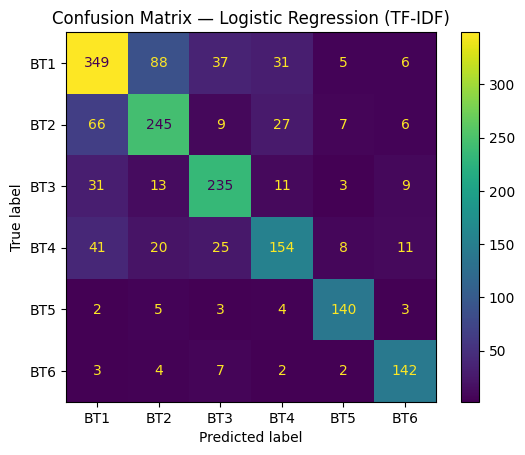

In [ ]:
# Confusion matrix plot
lrreg_cm = confusion_matrix(y_test_enc, y_pred_lrreg)
disp = ConfusionMatrixDisplay(confusion_matrix=lrreg_cm, display_labels=label_encoder.classes_)

plt.figure(figsize=(7, 7))
disp.plot(values_format="d", cmap=None)  # cmap=None keeps default styling
plt.title("Confusion Matrix — Logistic Regression (TF-IDF)")
plt.savefig("lrreg_cm.png")
plt.show()

# **Step 7: Classical Model 2: Linear SVM**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Train model
svm_model = LinearSVC(class_weight="balanced", random_state=42)
svm_model.fit(X_train_tfidf, y_train_enc)

LinearSVC(class_weight='balanced', random_state=42)

In [ ]:
# Make predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

In [ ]:
# Classification report
print("Linear SVM (TF-IDF) - Classification Report:\n")
print(classification_report(
    y_test_enc,
    y_pred_svm,
    target_names=label_encoder.classes_,
)) # Accuracy uplifted from 69% to 75% after switching TF-IDF's ngrams values from unigram to bigrams.

Linear SVM (TF-IDF) - Classification Report:

              precision    recall  f1-score   support

         BT1       0.71      0.72      0.71       516
         BT2       0.68      0.69      0.69       360
         BT3       0.77      0.84      0.80       302
         BT4       0.74      0.59      0.66       259
         BT5       0.86      0.90      0.88       157
         BT6       0.90      0.91      0.90       160

    accuracy                           0.75      1754
   macro avg       0.77      0.78      0.77      1754
weighted avg       0.75      0.75      0.75      1754



<Figure size 700x700 with 0 Axes>

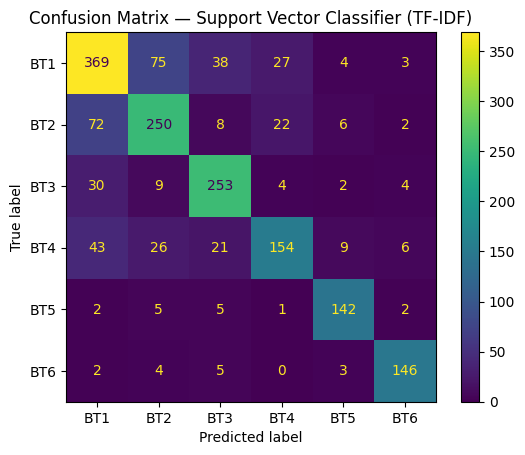

In [ ]:
# Confusion matrix plot
svc_cm = confusion_matrix(y_test_enc, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm, display_labels=label_encoder.classes_)

plt.figure(figsize=(7, 7))
disp.plot(values_format="d", cmap=None)  # cmap=None keeps default styling
plt.title("Confusion Matrix — Support Vector Classifier (TF-IDF)")
plt.savefig("svc_cm.png")
plt.show()

# **Step 8: Setup and prepare dataset for training DistilBERT**

In [ ]:
# initializing new column for bert
df_bert=df.copy()

In [ ]:
# simple data cleaning and normalization
df_bert["transformer text"]=df_bert["Questions"].astype(str).str.strip().str.replace(r"\s+", " ", regex=True)

In [ ]:
# Train/Test split using 80% training size and 20% testing size
X_train_bert, X_test_bert, y_train_bert, y_test_bert=train_test_split(df_bert["Questions"],df_bert["Category"],test_size=0.2,
                                                                      random_state=42,
                                                                      stratify=df_bert["Category"])

In [ ]:
#check for lenght of each training and testing size
print(f"The training size is: {len(X_train_bert)}")
print(f"The testing size is: {len(X_test_bert)}")

The training size is: 7013
The testing size is: 1754


In [ ]:
import numpy as np
# Quick preview
bert_sample=pd.DataFrame({"text_transformer":X_train_bert.sample(3,random_state=42).values,
                          "label":y_train_bert.sample(3,random_state=42).values})

In [ ]:
bert_sample

,text_transformer,label
0,Devise a system for automatically generating p...,BT6
1,Explain coordinate system with types in brief?,BT1
2,With neat pin diagram explain function of each...,BT1


# **Step 9: Tokenization for DistilBERT**

In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer=AutoTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# creating a numpy series from the training and testing dataset
X_train_s=pd.Series(X_train_bert)
X_test_s=pd.Series(X_test_bert)
y_train_s=pd.Series(y_train_bert)
y_test_s=pd.Series(y_test_bert)

In [ ]:
X_train_s.sample(3,random_state=42)

,Questions
7821,Devise a system for automatically generating p...
2891,Explain coordinate system with types in brief?
1375,With neat pin diagram explain function of each...


In [ ]:
texts=list(X_train_bert)

In [ ]:
# Calculating token lenght to analyse the max_lenght value as input token for distilBERT
token_lenght=[len(tokenizer.encode(text, add_special_tokens=True)) for text in X_train_bert]

In [ ]:
# Calculating the percentile for each occurences of tokens to finalise the max_lenght value of token to pass as an input in DistilBert.
percentiles=[0,25,50,75,90,95,99,100]
percentile_value=np.percentile(token_lenght,percentiles)

In [ ]:
#store the tokenized word's percentile in a separate pandas df for uniformity
token_len_table = pd.DataFrame({
    "Percentile": percentiles,
    "Token Length": percentile_value.astype(int)
})

In [ ]:
display(token_len_table)
print("Mean token length:", round(np.mean(token_lenght), 2))
print("Max token length :", int(np.max(token_lenght)))

,Percentile,Token Length
0,0,3
1,25,12
2,50,15
3,75,21
4,90,32
5,95,41
6,99,66
7,100,123


Mean token length: 18.43
Max token length : 123


## **Token Length Analysis for DistilBERT (Choosing `max_length`)**

Before training DistilBERT, we analyzed the **token length distribution** of the training texts using the DistilBERT tokenizer.  
This helps us choose a suitable `max_length` value that balances **information retention** and **training efficiency**.

### **Summary Statistics**
- **Mean token length:** 18.43  
  Most questions are short and require relatively few tokens.
- **Maximum token length:** 123  
  Only a small number of questions are very long.

  ---

### **Percentile Interpretation**
The percentile table shows how long the questions are after tokenization:

- **50th percentile (median) = 15 tokens**  
  Half of the dataset is 15 tokens or fewer.
- **75th percentile = 21 tokens**  
  75% of questions are 21 tokens or fewer.
- **90th percentile = 32 tokens**  
  90% of questions are 32 tokens or fewer.
- **95th percentile = 41 tokens**  
  95% of questions fit within 41 tokens (almost all data).
- **99th percentile = 66 tokens**  
  Only 1% of questions exceed 66 tokens.
- **100th percentile (max) = 123 tokens**  
  The longest question contains 123 tokens.

  ---

### **Final `max_length` Decision**
A value of **`max_length = 64`** was selected because:
- It is close to the **99th percentile** (66 tokens), meaning almost all samples fit without truncation.
- It avoids unnecessary padding for shorter questions, making training **faster and more memory efficient**.
- Only a very small fraction of long questions will be truncated.
---

This selection follows common industry practice: choose a `max_length` that covers most inputs (e.g., 95–99%) while keeping computational cost reasonable.


In [ ]:
# Imports for loading. training and evaluating DistilBERT
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer
)

In [ ]:
# Data Preparation
TEXT_COL = "Questions"
LABEL_COL = "Category"
# Simple normalization
X = df_bert[TEXT_COL].astype(str) # convert the object into string
y = df_bert[LABEL_COL].astype(str)

In [ ]:
# Performing Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Train:", len(X_train), "Test:", len(X_test))

Train: 7013 Test: 1754


In [ ]:
#Performing Train/Validation Split
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train,
    test_size=0.1,           # 10% validation from training set
    random_state=42,
    stratify=y_train
)

print("Train final:", len(X_train_final))
print("Val:", len(X_val))
print("Test:", len(X_test))

Train final: 6311
Val: 702
Test: 1754


In [ ]:
#Setup tokenizer and MAX_LENGHT
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
MAX_LENGTH = 64

In [ ]:
#Performing Label Encoding to make sure the category labels are converted from text data to numerical data
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_final)
y_val_enc   = le.transform(y_val)
y_test_enc  = le.transform(y_test)

In [ ]:
label_map = dict(zip(le.classes_, range(len(le.classes_))))
print("Label mapping:", label_map)

Label mapping: {'BT1': 0, 'BT2': 1, 'BT3': 2, 'BT4': 3, 'BT5': 4, 'BT6': 5}


In [ ]:
# Perform tokenization
# Tokenize in training dataset
train_enc = tokenizer(
    list(X_train_final),
    truncation=True,
    padding=True,
    max_length=MAX_LENGTH
)
# tokenize in validation dataset
val_enc = tokenizer(
    list(X_val),
    truncation=True,
    padding=True,
    max_length=MAX_LENGTH
)
# tokenize in testing dataset
test_enc = tokenizer(
    list(X_test),
    truncation=True,
    padding=True,
    max_length=MAX_LENGTH
)

In [ ]:
# PyTorch Dataset wrapper setup
class SimpleDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        # encodings = tokenizer output (dict: input_ids, attention_mask, ...)
        self.encodings = encodings
        # labels = encoded integer labels
        self.labels = labels

    def __len__(self):
        # number of samples
        return len(self.labels)

    def __getitem__(self, idx):
        # create one sample (tensors) for Trainer
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

train_dataset = SimpleDataset(train_enc, y_train_enc)
val_dataset   = SimpleDataset(val_enc,   y_val_enc)
test_dataset  = SimpleDataset(test_enc,  y_test_enc)
print("Datasets on Train:", len(train_dataset), "Val:", len(val_dataset), "Test:", len(test_dataset))

Datasets on Train: 6311 Val: 702 Test: 1754


In [ ]:
#Load DistilBERT classification model
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=len(le.classes_)
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Define a metrics function for fine tuning
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "macro_f1": f1_score(labels, preds, average="macro")
    }

In [ ]:
# Setup training arguments for finetuning the DistilBERT model
try:
    training_args = TrainingArguments(
        output_dir="distilbert_results",
        eval_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model="macro_f1",
        num_train_epochs=4, # changed from 2 to 3 because the accuracy was just 78%. again, changed from 3 to 4 because the accuracy was just 79%.
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        learning_rate=2e-5,
        weight_decay=0.01,
        logging_steps=50,
        report_to="none"
    )
except TypeError:
    print("Make sure that you're using updated metrics.")

In [ ]:
# Automate the training loop from HuggingFace's transformers
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Macro F1
1,0.348000,0.552122,0.807692,0.828878
2,0.312600,0.659117,0.804843,0.828710
3,0.233900,0.700578,0.810541,0.831302
4,0.159100,0.754668,0.810541,0.831592


TrainOutput(global_step=1580, training_loss=0.2646943575219263, metrics={'train_runtime': 267.111, 'train_samples_per_second': 94.508, 'train_steps_per_second': 5.915, 'total_flos': 418030694267904.0, 'train_loss': 0.2646943575219263, 'epoch': 4.0})

In [ ]:
# Evaluation of DistilBERT on testing dataset
test_pred = trainer.predict(test_dataset)
y_pred = np.argmax(test_pred.predictions, axis=1)
y_true = y_test_enc

print("\nFINAL TEST RESULTS")
print("Test Accuracy:", accuracy_score(y_true, y_pred))
print("Test Macro F1 :", f1_score(y_true, y_pred, average="macro"))

print("\nClassification Report (DistilBERT on Test):\n")
print(classification_report(y_true, y_pred, target_names=le.classes_, digits=4))


FINAL TEST RESULTS
Test Accuracy: 0.7958950969213227
Test Macro F1 : 0.8238548395679981

Classification Report (DistilBERT on Test):

              precision    recall  f1-score   support

         BT1     0.7616    0.7616    0.7616       516
         BT2     0.6878    0.7528    0.7188       360
         BT3     0.8547    0.8179    0.8359       302
         BT4     0.7991    0.7220    0.7586       259
         BT5     0.9125    0.9299    0.9211       157
         BT6     0.9441    0.9500    0.9470       160

    accuracy                         0.7959      1754
   macro avg     0.8266    0.8224    0.8239      1754
weighted avg     0.7982    0.7959    0.7964      1754



<Figure size 700x600 with 0 Axes>

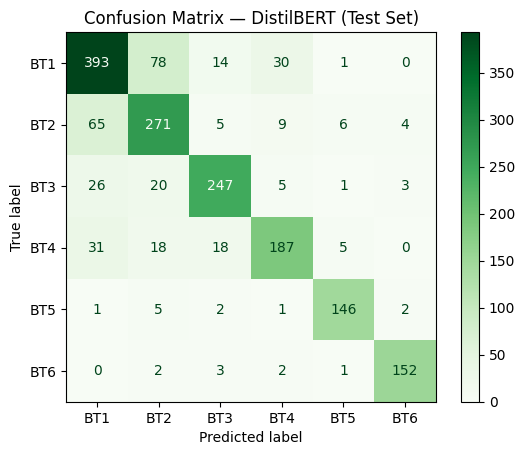

In [ ]:
# Confusion Matrix Evaluation
cm_bert = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bert, display_labels=le.classes_)

plt.figure(figsize=(7, 6))
disp.plot(cmap="Greens", values_format="d")
plt.title("Confusion Matrix — DistilBERT (Test Set)")
plt.savefig("cm_bert.png")
plt.show()

In [ ]:
# Save model
trainer.save_model("distilbert_best_model")
tokenizer.save_pretrained("distilbert_best_model")

('distilbert_best_model/tokenizer_config.json',
 'distilbert_best_model/special_tokens_map.json',
 'distilbert_best_model/vocab.txt',
 'distilbert_best_model/added_tokens.json',
 'distilbert_best_model/tokenizer.json')

# **Comparison of LR, SVM and DistilBERT**

## **1.1. Evaluation Summary table focused on Accuracy and Macro F1-score**

In [ ]:
summary = pd.DataFrame({
    "Model": ["Logistic Regression (TF-IDF)", "Linear SVM (TF-IDF)", "DistilBERT"],
    "Accuracy": [0.72, 0.75, 0.7958950969213227],
    "Macro F1": [0.74, 0.77, 0.8238548395679981],
})

summary

,Model,Accuracy,Macro F1
0,Logistic Regression (TF-IDF),0.720000,0.740000
1,Linear SVM (TF-IDF),0.750000,0.770000
2,DistilBERT,0.795895,0.823855


## **Bar Chart for overall model performances**

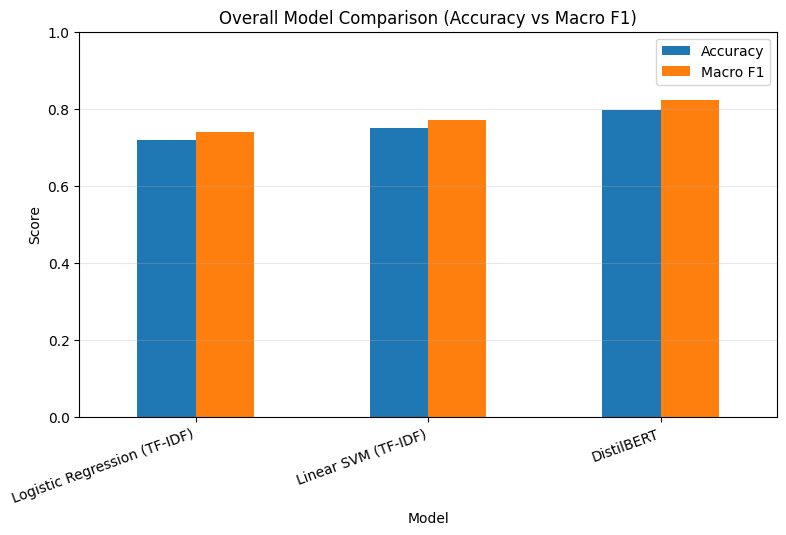

In [ ]:
plot_df = summary.set_index("Model")[["Accuracy", "Macro F1"]]
ax = plot_df.plot(kind="bar", figsize=(9,5))
plt.title("Overall Model Comparison (Accuracy vs Macro F1)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=20, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.savefig("model_comparison.png")
plt.show()

## **F1 Heatmap per classes**

In [ ]:
classes = ["BT1","BT2","BT3","BT4","BT5","BT6"]

f1 = pd.DataFrame({
    "LogReg_TFIDF":  [0.69, 0.67, 0.76, 0.63, 0.87, 0.84],
    "LinearSVM_TFIDF":[0.71, 0.69, 0.80, 0.66, 0.88, 0.90],
    "DistilBERT":    [0.7616, 0.7188, 0.8359, 0.7586, 0.9211, 0.9470],
}, index=classes)

f1

,LogReg_TFIDF,LinearSVM_TFIDF,DistilBERT
BT1,0.69,0.71,0.7616
BT2,0.67,0.69,0.7188
BT3,0.76,0.80,0.8359
BT4,0.63,0.66,0.7586
BT5,0.87,0.88,0.9211
BT6,0.84,0.90,0.9470


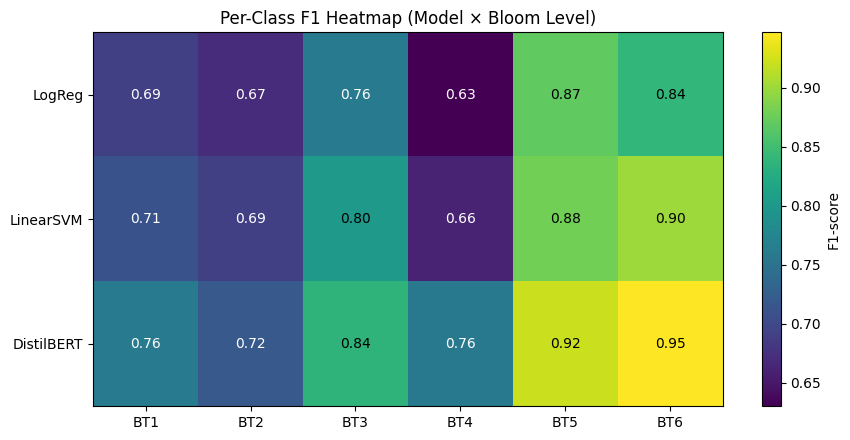

In [ ]:
data = f1_df.T.values              # rows=models, cols=classes
rows = f1_df.columns.tolist()      # model names
cols = f1_df.index.tolist()        # class names

plt.figure(figsize=(9, 4.5))
im = plt.imshow(data, aspect="auto")

# Axis labels
plt.xticks(range(len(cols)), cols)
plt.yticks(range(len(rows)), rows)
plt.colorbar(im, label="F1-score")
plt.title("Per-Class F1 Heatmap (Model × Bloom Level)")

# Add text numbers inside each cell
for i in range(len(rows)):
    for j in range(len(cols)):
        plt.text(
            j, i,
            f"{data[i, j]:.2f}",   # format to 2 decimal places
            ha="center", va="center",
            color="white" if data[i, j] < 0.78 else "black"
        )

plt.tight_layout()
plt.savefig("f1_heatmap.png")
plt.show()

## **Grouped bar chart: per-class F1**

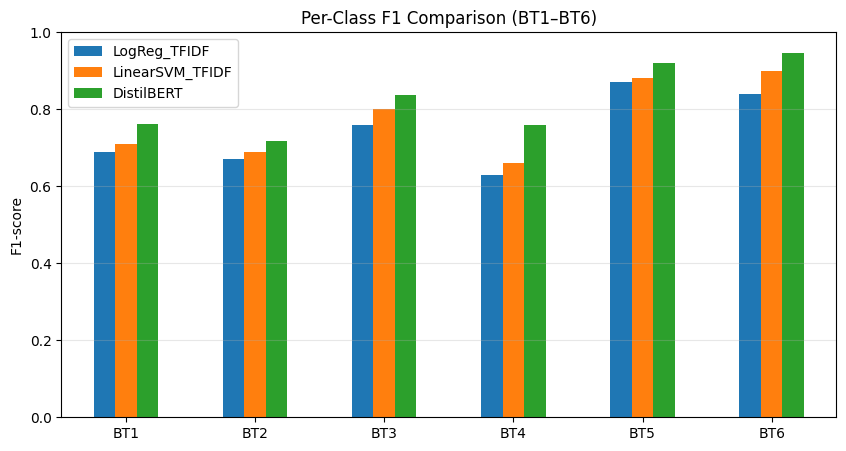

In [ ]:
ax = f1.plot(kind="bar", figsize=(10,5))
plt.title("Per-Class F1 Comparison (BT1–BT6)")
plt.ylabel("F1-score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.savefig("f1_grouped_bar.png")
plt.show()

## **Build Precision, Recall, F1 tables per Category classes**

In [ ]:
classes = ["BT1","BT2","BT3","BT4","BT5","BT6"]

metrics = {
    "LogReg": {
        "precision": [0.71, 0.65, 0.74, 0.67, 0.85, 0.80],
        "recall":    [0.68, 0.68, 0.78, 0.59, 0.89, 0.89],
        "f1":        [0.69, 0.67, 0.76, 0.63, 0.87, 0.84]
    },
    "LinearSVM": {
        "precision": [0.71, 0.68, 0.77, 0.74, 0.86, 0.90],
        "recall":    [0.72, 0.69, 0.84, 0.59, 0.90, 0.91],
        "f1":        [0.71, 0.69, 0.80, 0.66, 0.88, 0.90]
    },
    "DistilBERT": {
        "precision": [0.7616, 0.6878, 0.8547, 0.7991, 0.9125, 0.9441],
        "recall":    [0.7616, 0.7528, 0.8179, 0.7220, 0.9299, 0.9500],
        "f1":        [0.7616, 0.7188, 0.8359, 0.7586, 0.9211, 0.9470]
    }
}

precision_df = pd.DataFrame({m: metrics[m]["precision"] for m in metrics}, index=classes)
recall_df    = pd.DataFrame({m: metrics[m]["recall"]    for m in metrics}, index=classes)
f1_df        = pd.DataFrame({m: metrics[m]["f1"]        for m in metrics}, index=classes)

precision_df

,LogReg,LinearSVM,DistilBERT
BT1,0.71,0.71,0.7616
BT2,0.65,0.68,0.6878
BT3,0.74,0.77,0.8547
BT4,0.67,0.74,0.7991
BT5,0.85,0.86,0.9125
BT6,0.80,0.90,0.9441


In [ ]:
recall_df

,LogReg,LinearSVM,DistilBERT
BT1,0.68,0.72,0.7616
BT2,0.68,0.69,0.7528
BT3,0.78,0.84,0.8179
BT4,0.59,0.59,0.7220
BT5,0.89,0.90,0.9299
BT6,0.89,0.91,0.9500


In [ ]:
f1_df

,LogReg,LinearSVM,DistilBERT
BT1,0.69,0.71,0.7616
BT2,0.67,0.69,0.7188
BT3,0.76,0.80,0.8359
BT4,0.63,0.66,0.7586
BT5,0.87,0.88,0.9211
BT6,0.84,0.90,0.9470


In [ ]:
def plot_metric_heatmap(df_metric, title, cbar_label):
    """
    df_metric: DataFrame where rows = classes (BT1..BT6), cols = models
              Example: precision_df, recall_df, f1_df
    """
    data = df_metric.T.values                 # rows=models, cols=classes
    row_labels = df_metric.columns.tolist()   # model names
    col_labels = df_metric.index.tolist()     # BT labels

    plt.figure(figsize=(9, 4.2))
    im = plt.imshow(data, aspect="auto")

    # Axis labels
    plt.xticks(range(len(col_labels)), col_labels)
    plt.yticks(range(len(row_labels)), row_labels)

    # Color bar
    plt.colorbar(im, label=cbar_label)

    # Title
    plt.title(title)

    # Put numbers inside each cell
    for i in range(len(row_labels)):
        for j in range(len(col_labels)):
            val = data[i, j]
            plt.text(
                j, i, f"{val:.2f}",
                ha="center", va="center",
                color="white" if val < 0.78 else "black"
            )
    plt.grid(False)
    plt.tight_layout()
    plt.savefig("precision_heatmap.png")
    plt.savefig("recall_heatmap.png")
    plt.show()

## **Precision Heatmap**

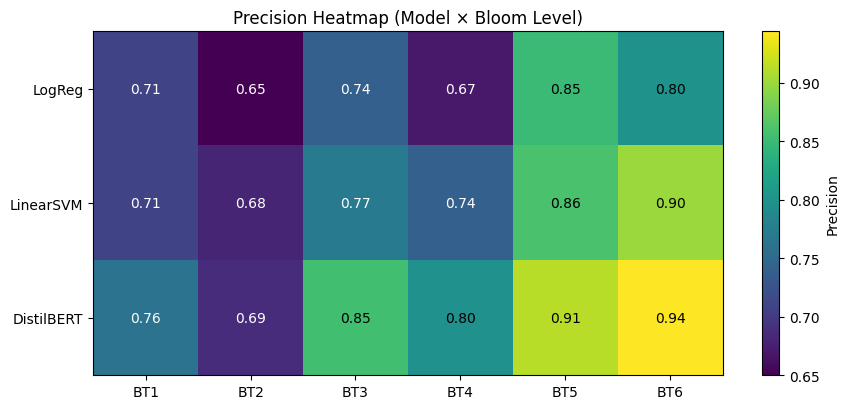

In [ ]:
plot_metric_heatmap(precision_df, "Precision Heatmap (Model × Bloom Level)", "Precision")

## **Recall Heatmap**

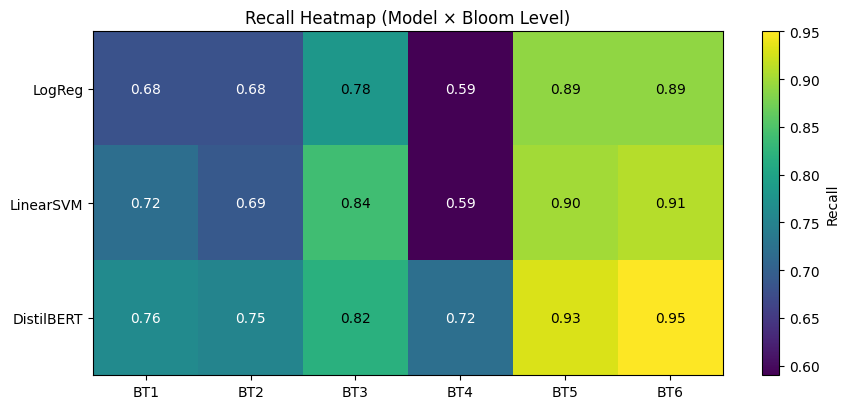

In [ ]:
plot_metric_heatmap(recall_df, "Recall Heatmap (Model × Bloom Level)", "Recall")

## **Precision grouped bar chart per category classes**

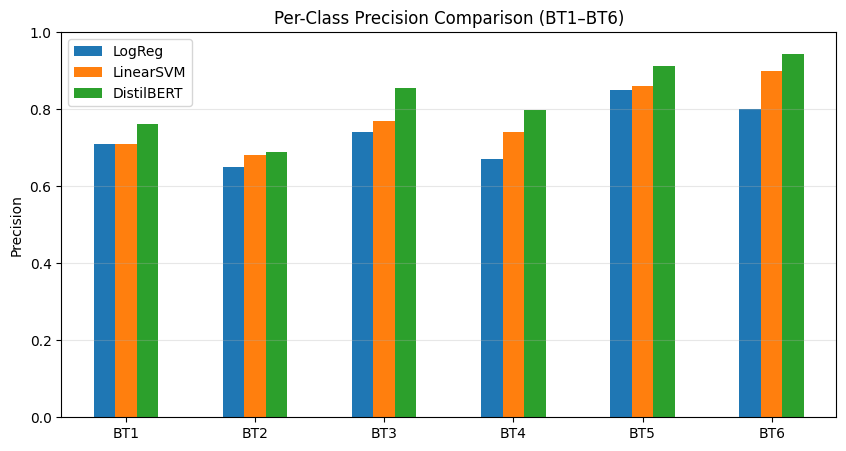

In [ ]:
ax = precision_df.plot(kind="bar", figsize=(10, 5))
plt.title("Per-Class Precision Comparison (BT1–BT6)")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.savefig("precision_grouped_bar.png")
plt.show()

## **Recall grouped bar chart per category classes**

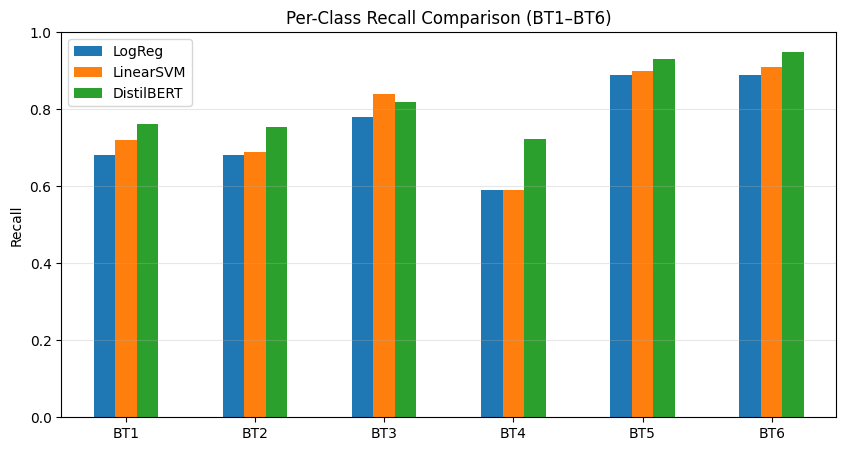

In [ ]:
ax = recall_df.plot(kind="bar", figsize=(10, 5))
plt.title("Per-Class Recall Comparison (BT1–BT6)")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.savefig("recall_grouped_bar.png")
plt.show()

# **ROC-AUC Curve**

In [ ]:
# Helper function to plot OvR ROC curves
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(y_true, y_score, class_names, title):
    """
    y_true: integer labels (n_samples,)
    y_score: probability/score matrix (n_samples, n_classes)
    """
    y_bin = label_binarize(y_true, classes=range(len(class_names)))

    plt.figure(figsize=(8,6))

    aucs = []
    for i, cname in enumerate(class_names):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, label=f"{cname} (AUC={roc_auc:.3f})")

    plt.plot([0,1],[0,1], linestyle="--")
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(fontsize=8)
    plt.grid(alpha=0.3)
    plt.savefig("lr_roc.png")
    plt.savefig("svm_roc.png")
    plt.savefig("bert_roc.png")
    plt.show()

    print("Macro AUC (mean across classes):", np.mean(aucs))

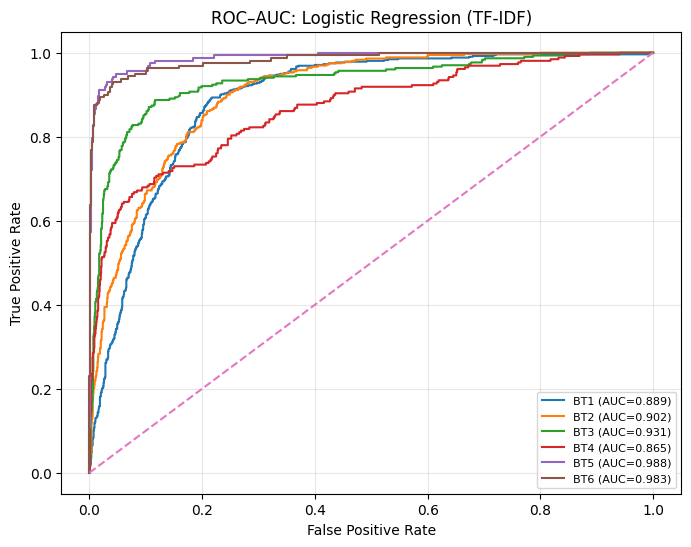

Macro AUC (mean across classes): 0.9263591644653463


In [ ]:
# Logistic Regression
lr_probs = logistic_regression.predict_proba(X_test_tfidf)
plot_multiclass_roc(y_test_enc, lr_probs, le.classes_, "ROC–AUC: Logistic Regression (TF-IDF)")

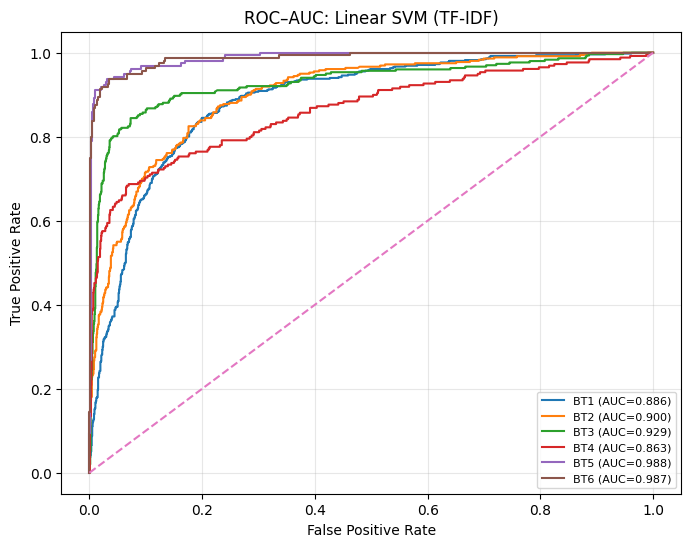

Macro AUC (mean across classes): 0.9253912072892003


In [ ]:
# SVC Model
svm_scores = svm_model.decision_function(X_test_tfidf)
plot_multiclass_roc(y_test_enc, svm_scores, le.classes_, "ROC–AUC: Linear SVM (TF-IDF)")

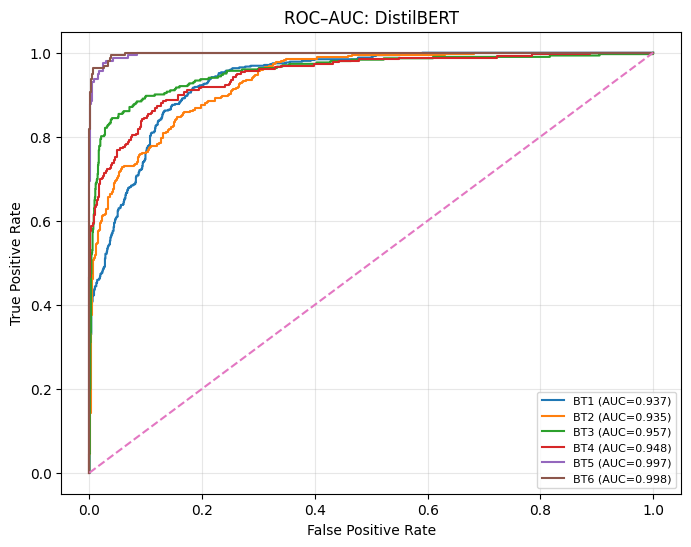

Macro AUC (mean across classes): 0.9620584509821534


In [ ]:
# DistilBERT
# Convert logits to probabilities
pred = trainer.predict(test_dataset)
logits = pred.predictions
bert_probs = torch.softmax(torch.tensor(logits), dim=1).numpy()

plot_multiclass_roc(y_test_enc, bert_probs, le.classes_, "ROC–AUC: DistilBERT")